# Ford-Go-Bike Trip Dataset Exploration
## by Gift Omodu

## Introduction
> The data contains the duration of bike rides and other attributes like time of ride, gender, etc from the city of San francisco.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
    
%matplotlib inline

In [2]:
df1 = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bike_df= df1.copy()

In [4]:
bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
bike_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
bike_df.duplicated().sum()

0

##  Cleaning

### Qualitative issues

1. The presence of a start and end station name, station geo tags(latitude and longitude)
2. The presence of missing data
3. The time related fields has an object data type
4. The member birth year field is in a float data type

#### 1. The presence of a start and end station name, station geo tags(latitude and longitude)
Define:\
Drop the start and end columns associated with station name, latitude, longitude and the ride duration in minutes columns 

Code

In [7]:
bike_df.drop(['start_station_latitude', 'start_station_longitude', 'start_station_name', 'end_station_latitude', 
        'end_station_longitude', 'end_station_name'], axis =1, inplace=True)

Test

In [8]:
bike_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
108577,471,2019-02-13 07:43:30.0070,2019-02-13 07:51:21.6190,23.0,80.0,1886,Subscriber,1983.0,Male,No
137193,543,2019-02-08 08:53:11.7020,2019-02-08 09:02:14.7710,246.0,259.0,1996,Subscriber,1995.0,Male,No
180507,808,2019-02-01 10:45:25.5250,2019-02-01 10:58:53.6610,6.0,371.0,5522,Customer,1985.0,Male,No
39900,551,2019-02-23 00:07:58.7060,2019-02-23 00:17:10.1880,43.0,73.0,6085,Subscriber,1984.0,Male,No
118814,588,2019-02-11 18:27:02.2540,2019-02-11 18:36:51.2510,127.0,55.0,5424,Customer,1990.0,Male,No


#### 2. The presence of missing data
Define:\
Drop all rows with missing data

Code

In [9]:
bike_df.dropna(inplace=True)

Test

In [10]:
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
end_station_id             0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### 3. The time related fields has an object data type
Define:\
Convert the data type on the start_time and end_time columns to datetime format

Code

In [11]:
bike_df ['start_time']=pd.to_datetime(bike_df ['start_time'])
bike_df ['end_time'] = pd.to_datetime(bike_df ['end_time'])

Test

In [12]:
bike_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
end_station_id                    float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### 4. The member birth year field is in a float data type
Define: \
Convert the member birth year field data type from float to int 

Code

In [13]:
bike_df['member_birth_year']= bike_df['member_birth_year'].astype(np.int64)

Test

In [14]:
bike_df['member_birth_year'].dtypes

dtype('int64')

In [15]:
bike_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
end_station_id                    float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Cleaned data saved

In [16]:
bike_df.to_csv('ford_bike_clean_data.csv')

In [17]:
fgb = bike_df

In [18]:
# Assesing clean data (fgb) programatically.

print(fgb.shape)
print(fgb.dtypes)
fgb.sample(5)

(174952, 10)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
end_station_id                    float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
82213,359,2019-02-18 11:01:26.425,2019-02-18 11:07:25.906,238.0,258.0,6360,Subscriber,1995,Male,No
41130,213,2019-02-22 19:03:25.687,2019-02-22 19:06:59.544,237.0,226.0,4858,Subscriber,1982,Male,Yes
50364,469,2019-02-21 19:17:30.736,2019-02-21 19:25:20.397,58.0,285.0,6560,Subscriber,1987,Male,No
78696,760,2019-02-18 18:46:03.038,2019-02-18 18:58:43.938,16.0,58.0,5445,Subscriber,1998,Male,No
130661,749,2019-02-09 16:10:40.295,2019-02-09 16:23:09.648,296.0,280.0,3967,Subscriber,1995,Male,Yes


In [19]:
#Descripitve statistics for numerical variables 
fgb.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135
std,1642.204905,111.648819,111.335635,1659.195937,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 174,952 bike ride entries spread across 8 features (duration_sec, start_time & end_time, start_station_id & end_station_id, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip). Of these are 3 numerical data (duration_sec, bike_id, member_birth_year) and 5 categorical data (start_time & end_time,  start_station_id & end_station_id, user_type, gender and bike_share_for_all_trip)

### What is/are the main feature(s) of interest in your dataset?

> In this dataset, it will be revealing to keep an eye of the nature of riders as to the user type, gender and population invovled in this event.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the start time for the rides will be affected as to the gender and location of the start and finish points. 

## Univariate Exploration


### What is the distribution of the duration of ride?

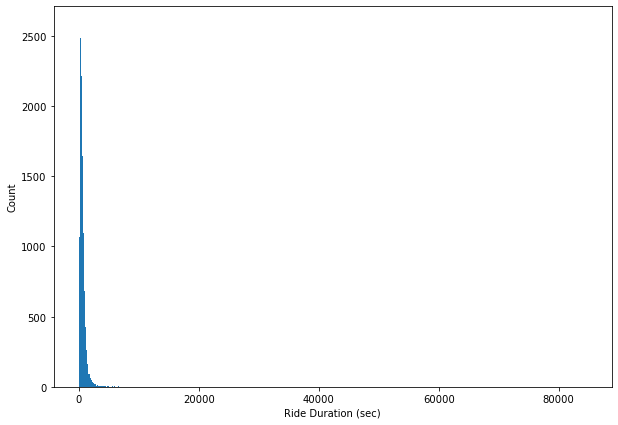

In [36]:
# Distribution of ride duration on a normal scale
plt.figure(figsize= [10,7])
bins = np.arange(60, fgb['duration_sec'].max()+50,10)
plt.hist(data = fgb, x = 'duration_sec', bins = bins)
plt.xlabel('Ride Duration (sec)')
plt.ylabel('Count');

A normal scale plot on this variable has some obscurity. 

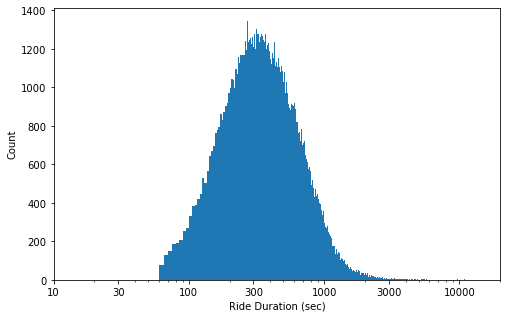

In [37]:
# Adding some log transformation to the plot
bins = np.arange(0, fgb['duration_sec'].max()+10, 5)

ticks=[10, 30, 100, 300, 1000, 3000, 10000]
plt.figure(figsize=[8, 5])
plt.hist(data = fgb, x = 'duration_sec', bins = bins)
plt.xlabel('Ride Duration (sec)')
plt.ylabel('Count')
plt.xscale('log')
plt.xlim(50, 20000)
plt.xticks(ticks, ticks);

This plot tells us that the data is unimodal and it is skewed to the right.\
The initial plot on a normal scale in the ride duration column led to the clustering of data points. So a lograthimic transfomation to the scale was needed to have a good spread of data points.

### What is the distribution of the start and end points of the race?

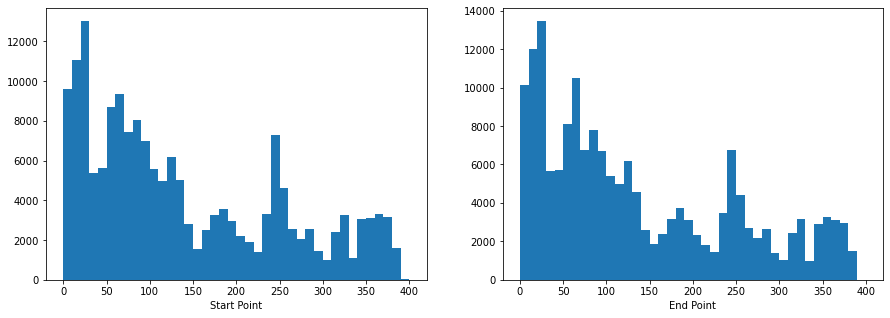

In [22]:
# Plotting start and end point on a normal scale

plt.figure(figsize=[15,5])
bins= np.arange(0, fgb['start_station_id'].max()+5, 10)

plt.subplot(1,2,1)
plt.hist(data = fgb, x = 'start_station_id', bins = bins)
plt.xlabel('Start Point')

plt.subplot(1,2,2)
plt.hist(data = fgb, x = 'end_station_id', bins = bins)
plt.xlabel('End Point');


A normal distribution of these sets of data are almost identical. You can see an initial rise from the left which peaked at the third bin before a sharp fall and then intermintent rise and fall of data set as they generally taperred downwards towards the right. Both data sets are unimodal and are largely skewed to the right.

### What is the distribution of the birth year of members?

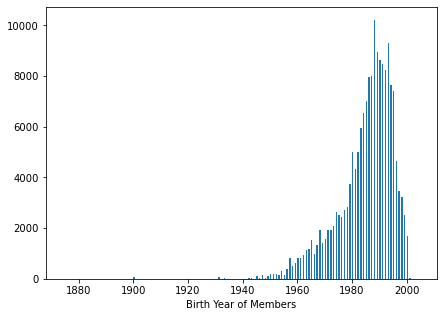

In [23]:
# Distribution of the birth year of members on a normal scale
plt.figure(figsize= [7,5])
bins= np.arange(0, fgb['member_birth_year'].max()+50,0.5)
plt.hist(data = fgb, x = 'member_birth_year', bins=bins)
plt.xlabel('Birth Year of Members')
plt.xlim(fgb['member_birth_year'].min()-10, fgb['member_birth_year'].max()+10);


This distribution was investigated using a smaller bin size of 0.5. This clearly showed that the dataset is unimodal and is skewed to the left. The smaller bin sizes were required to declutter data points.

## Bivariate Exploration


### How long did it take most of the riders to finish the race?

In [24]:
#Convert ride duration from seconds to hours
duration_hr= fgb['duration_sec']/3600

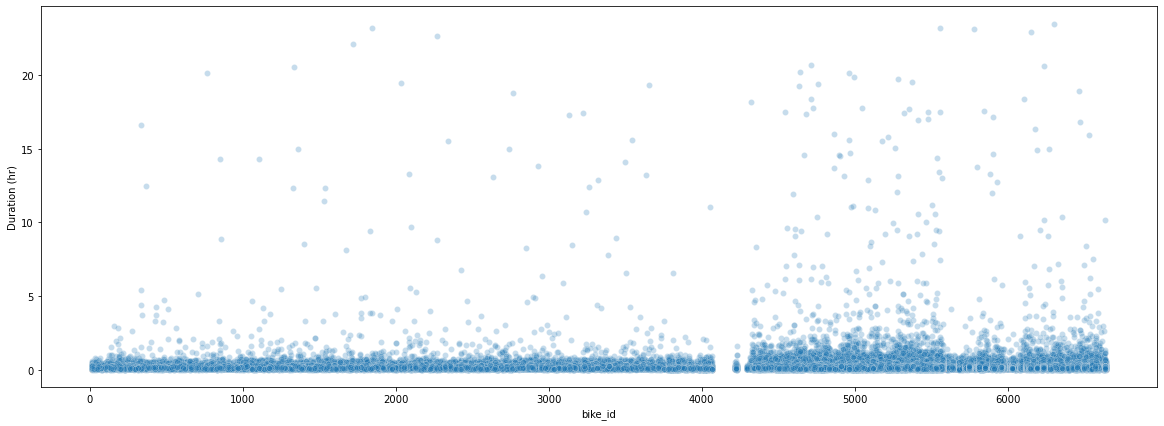

In [25]:
# A plot of duration vs bike id
plt.figure(figsize=[20,7])

sb.scatterplot(data= fgb, x= 'bike_id', y= duration_hr, alpha= 1/4)
plt.ylabel('Duration (hr)');


On comparing the ride duration(in hours) against the bike_ids, we saw more persons in the ride finishng in less than 3 hours

### Is there a preference to starting points by gender?

<Figure size 1440x504 with 0 Axes>

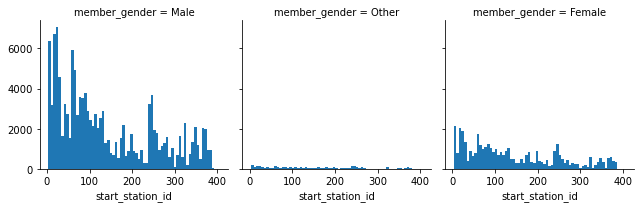

In [26]:
# A plot of start stations against gender

plt.figure(figsize=[20,7])

bins = np.arange(3, 400+6, 6)
g =sb.FacetGrid(data= fgb, col='member_gender', col_wrap=3)
g.map(plt.hist, 'start_station_id', bins = bins);


Both gender had their perculiar start points. As can be seen in the 4th column of the male gender and on the 1st column of the female gender.

### How does the members birth year compare to the riders?

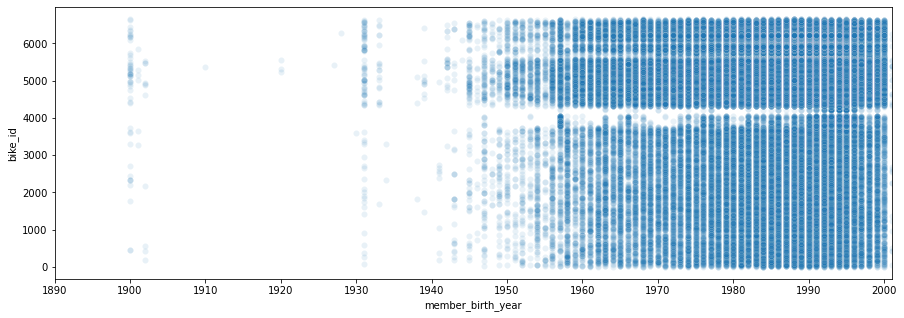

In [27]:
# Year of birth vs bike id
plt.figure(figsize=[15,5])

sb.scatterplot(data= fgb, x='member_birth_year', y= 'bike_id', alpha= 1/10)
ticks = np.arange(1880, fgb['member_birth_year'].max()+10, 10)
plt.xticks(ticks, ticks);
plt.xlim(1890, fgb['member_birth_year'].max());

The spread in terms of birth year shows that we had more participants within the birth year bracket of 1950-2000.

### How many riders by gender on a daily basis?

In [49]:
def my_countplot(df,xVar, dhue):
    plt.figure(figsize=[10,7])
    
    sb.countplot(data =df, x=xVar, hue =dhue)

In [28]:
# Grouping riders by day of ride

per_day= fgb['start_time'].dt.day

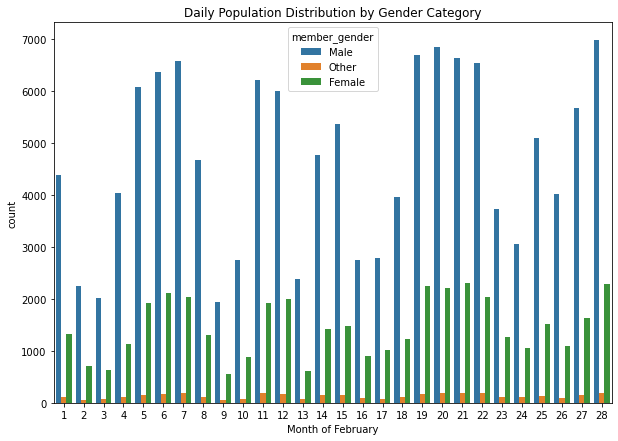

In [54]:
#A plot of start time date against gender
my_countplot(fgb, per_day, 'member_gender')
plt.xlabel('Month of February')
plt.title('Daily Population Distribution by Gender Category');

Above is an overview of the days the ride took place. We can see an interchangeable rise and fall in riders for both gender with most riders coming out on the 28th day of February.

### How many riders on a weekly basis?

In [30]:
# Grouping by week
per_wk = fgb['start_time'].dt.isocalendar().week

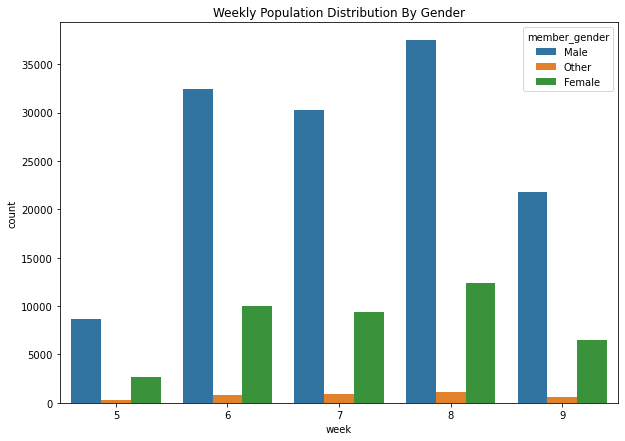

In [52]:
my_countplot(fgb, per_wk, 'member_gender')
plt.title('Weekly Population Distribution By Gender');

The chart shows that the riders were not much on the 5th week, peaked the next week and were more on the 8th week.

## Multivariate Exploration


### What is the performance of riders by gender? 

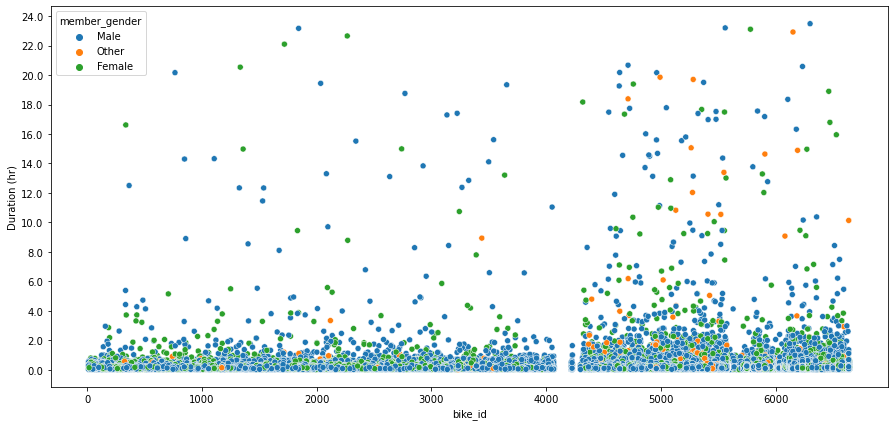

In [38]:
# A plot of the duration against bike_ids and gender
plt.figure(figsize=[15, 7])

ticks= np.arange(0, duration_hr.max()+2, 2)

sb.scatterplot(data= fgb, x='bike_id', y=duration_hr, hue= 'member_gender')
plt.ylabel('Duration (hr)')
plt.yticks(ticks, ticks);

The above plot reveals that more male riders finished in less than 2 hours when compared to the sample size of the male riders.

### Where the riders customers or one-off subscribers?

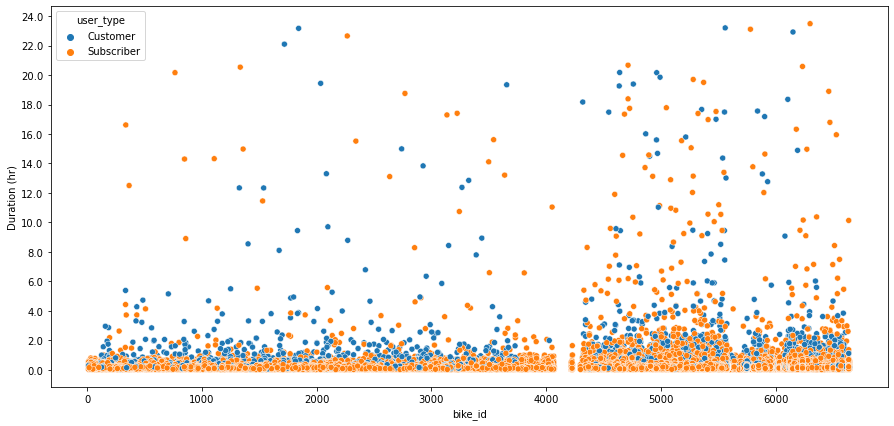

In [33]:
# A plot of the duration against bike_ids and user_type
plt.figure(figsize=[15, 7])

ticks= np.arange(0, duration_hr.max()+2, 2)

sb.scatterplot(data= fgb, x='bike_id', y=duration_hr, hue= 'user_type')
plt.ylabel('Duration (hr)')
plt.yticks(ticks, ticks);

The plot reveals that we had more subscribers than customers. Majority of the subscribers finished the race in less than 3 hours.

### Did we have more shared rides?

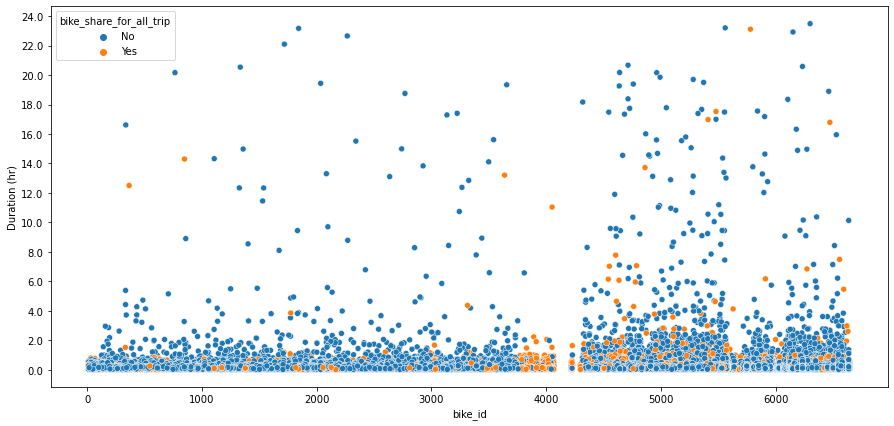

In [34]:
#A plot of bike_id agianst duration in hour and shared ride
plt.figure(figsize=[15, 7])

ticks= np.arange(0, duration_hr.max()+2, 2)

sb.scatterplot(data= fgb, x='bike_id', y=duration_hr, hue= 'bike_share_for_all_trip')
plt.ylabel('Duration (hr)')
plt.yticks(ticks, ticks);

The scatter plot reveals that very few rides were shared as agianst the sample size. Of all the shared rides, only one of such ride had over 22 hours in ride duration.

### Were there any interesting or surprising interactions between features?

> There were more persons who finished the ride in less than 3hours, of which majority were subscribers. They equally had a higher number of shared rides as compared to the total number of shared ride within the various duraton of ride.

## Conclusions
>In conclusion, the data clearly showed us that we had more male gender in the ride than any other gender. It goes further to show that more male riders had a greater than 8 hours ride duration. For some reason, women didn't participate much in the riding event. There greatest turn-out on a daily basis was on the 21st of February and turned out the highest during the 8th week. It was a heavily dominated men's event with more male particpant joing the ride on the last day being 28th of February. The equally had the highest turn-out in terms of week on the 8th week also. 
Overall, we had more subscribers than customers coming for the event.